In [19]:
# Distribution and Dispersion
# Dispersion - range of data, Eg: 0 to 100

import pandas as pd
titanic_df = pd.read_csv('titanic.csv')
titanic_df.info()
print(titanic_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                           

In [28]:
print(titanic_df[['Fare', 'Parch', 'Survived', 'PassengerId']].dtypes)
titanic_df = titanic_df.dropna()
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
titanic_df['Parch'] = titanic_df['Parch'].astype(int)
print("After changing datatypes:")
print(titanic_df[['Fare', 'Parch', 'Survived', 'PassengerId']].dtypes)

Fare           int32
Parch          int32
Survived       int64
PassengerId    int64
dtype: object
After changing datatypes:
Fare           int32
Parch          int32
Survived       int64
PassengerId    int64
dtype: object


In [21]:
# calc mean, median, standard deviation and quartiles

stats = titanic_df[['Fare', 'Parch', 'Survived', 'PassengerId', 'Age', 'SibSp']].agg(['mean', 'median', 'std', 'min', 'max', 'quantile'])

stats.loc['1st_quartile'] = titanic_df[['Fare', 'Parch', 'Survived', 'PassengerId', 'Age', 'SibSp']].quantile(0.25)
stats.loc['2nd_quartile'] = titanic_df[['Fare', 'Parch', 'Survived', 'PassengerId', 'Age', 'SibSp']].quantile(0.5)
stats.loc['3rd_quartile'] = titanic_df[['Fare', 'Parch', 'Survived', 'PassengerId', 'Age', 'SibSp']].quantile(0.75)
stats.loc['4th_quartile'] = titanic_df[['Fare', 'Parch', 'Survived', 'PassengerId', 'Age', 'SibSp']].quantile(1.0)

print(stats)

                    Fare     Parch  Survived  PassengerId        Age     SibSp
mean           97.666667  0.482759  0.505747  1102.712644  39.247126  0.597701
median         71.000000  0.000000  1.000000  1094.000000  39.000000  1.000000
std            88.165894  0.860801  0.502865   126.751901  15.218730  0.637214
min             0.000000  0.000000  0.000000   904.000000   1.000000  0.000000
max           512.000000  4.000000  1.000000  1306.000000  76.000000  3.000000
quantile       71.000000  0.000000  1.000000  1094.000000  39.000000  1.000000
1st_quartile   35.000000  0.000000  0.000000   986.000000  27.000000  0.000000
2nd_quartile   71.000000  0.000000  1.000000  1094.000000  39.000000  1.000000
3rd_quartile  134.500000  1.000000  1.000000  1216.000000  50.000000  1.000000
4th_quartile  512.000000  4.000000  1.000000  1306.000000  76.000000  3.000000


In [22]:
mode_values = titanic_df[['Pclass', 'Sex', 'Embarked']].mode()
print(mode_values)

mode_values = titanic_df['Pclass'].mode()
print(mode_values)

mode_values = titanic_df['Sex'].mode()
print(mode_values)

mode_values = titanic_df['Embarked'].mode()
print(mode_values)


   Pclass     Sex Embarked
0       1  female        C
0    1
Name: Pclass, dtype: int64
0    female
Name: Sex, dtype: object
0    C
Name: Embarked, dtype: object


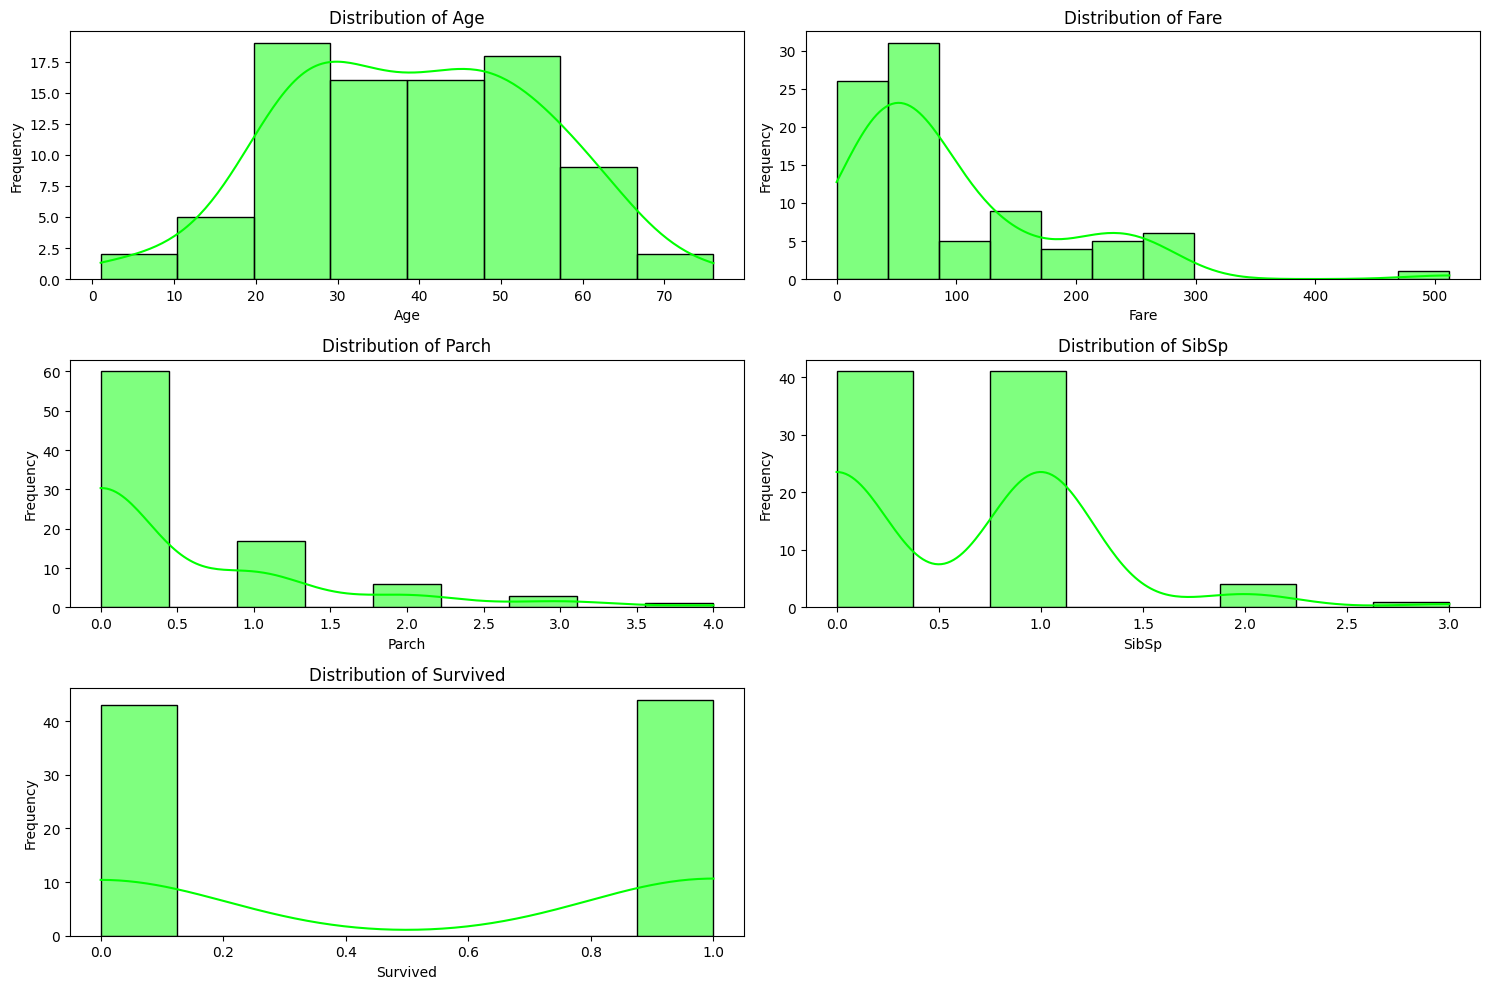

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['Age', 'Fare', 'Parch', 'SibSp', 'Survived']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    sns.histplot(titanic_df[var].dropna(), kde=True, color='lime')
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

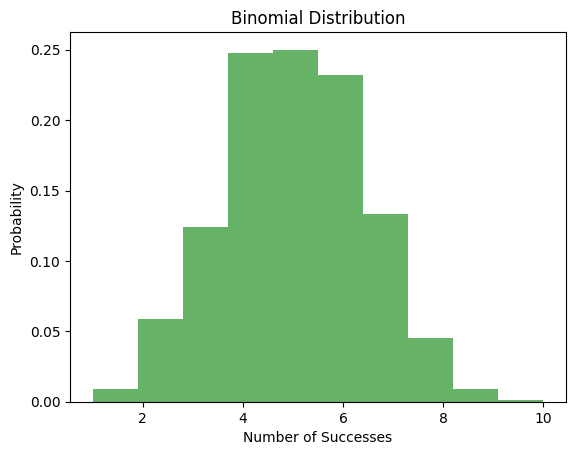

In [24]:
import numpy as np
import matplotlib.pyplot as plt
n, p = 10, 0.5

data = np.random.binomial(n, p, 1000)
plt.hist(data, bins = 10, density = True, alpha = 0.6, color = 'g')
plt.title('Binomial Distribution')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()

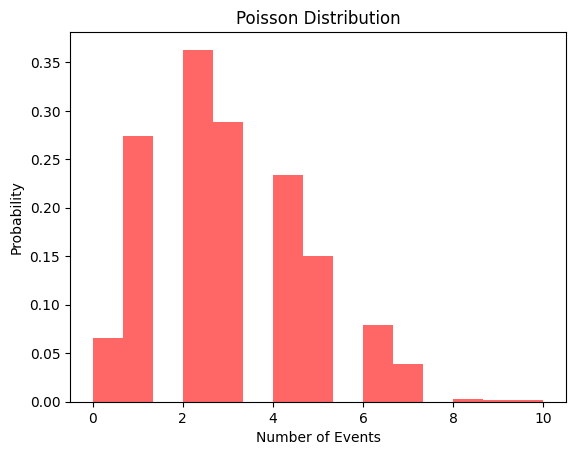

In [25]:
# Poisson - freq related to time slot
# intervals can be empty, unlike binomial

import numpy as np
import matplotlib.pyplot as plt

# lambda = average number of events
lam = 3
data = np.random.poisson(lam, 1000)

plt.hist(data, bins = 15, density = True, alpha = 0.6, color = 'r')
plt.title('Poisson Distribution')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.show()

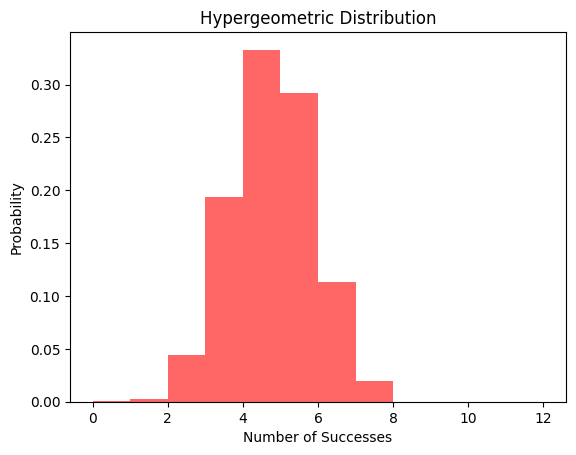

In [26]:
# Hypergeometric - eg: drawing cards from a deck without replacement and counting the number of aces drawn.
import numpy as np
import matplotlib.pyplot as plt

# K = toal success states, n = number of draws
N, K, n = 20, 7, 12
data = np.random.hypergeometric(K, N-K, n, 1000)

plt.hist(data, bins = range(n+1), density = True, alpha = 0.6, color = 'r')
plt.title('Hypergeometric Distribution')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()

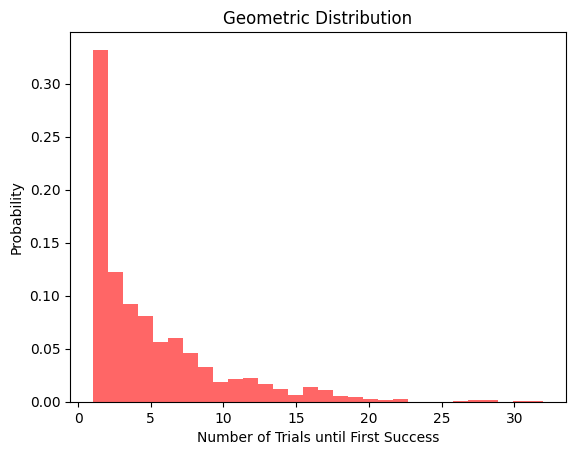

In [27]:
# Geometric Disctribution - eg: Rolling a  die repeatedly until the first time a 6 appears

# p = probability of success
p = 0.2
data = np.random.geometric(p, 1000)

plt.hist(data, bins = 30, density = True, alpha = 0.6, color = 'r')
plt.title('Geometric Distribution')
plt.xlabel('Number of Trials until First Success')
plt.ylabel('Probability')
plt.show()

In [50]:
import pandas as pd

def find_outliers(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    
    IQR = Q3 - Q1

    outliers = df[(df[variable] < Q1 - 1.5 * IQR) | (df[variable] > Q3 + 1.5 * IQR)]
    
    print(f"Outliers in {variable}:")
    print(outliers[[variable]])
    
    return outliers, Q1, Q3

columns = ['Age', 'Fare', 'Parch', 'SibSp', 'Survived']

for column in columns:
    outliers, Q1, Q3 = find_outliers(titanic_df, column)
    titanic_df = titanic_df[(titanic_df[column] >= Q1) & (titanic_df[column] <= Q3)]

print("After removing outliers:")
print(titanic_df.head())

Outliers in Age:
Empty DataFrame
Columns: [Age]
Index: []
Outliers in Fare:
Empty DataFrame
Columns: [Fare]
Index: []
Outliers in Parch:
Empty DataFrame
Columns: [Parch]
Index: []
Outliers in SibSp:
     SibSp
118      0
Outliers in Survived:
Empty DataFrame
Columns: [Survived]
Index: []
After removing outliers:
     PassengerId  Survived  Pclass  \
44           936         1       1   
100          992         1       1   

                                                  Name     Sex   Age  SibSp  \
44    Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)  female  45.0      1   
100  Stengel, Mrs. Charles Emil Henry (Annie May Mo...  female  43.0      1   

     Parch Ticket  Fare Cabin Embarked  
44       0  11753    52   D19        S  
100      0  11778    55  C116        C  
